In [ ]:
# 加载数据

In [2]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

In [3]:
print(train_images.shape)

(60000, 28, 28)


In [4]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [5]:
print(type(train_images[0]))

<class 'numpy.ndarray'>


In [6]:
#print(a1)  
print("数据类型",type(train_images))           #打印数组数据类型  
print("数组元素数据类型：",train_images[0].dtype) #打印数组元素数据类型  
print("数组元素总数：",train_images[0].size)      #打印数组尺寸，即数组元素总数  
print("数组形状：",train_images[0].shape)         #打印数组形状  
print("数组的维度数目",train_images[0].ndim)      #打印数组的维度数目 

数据类型 <class 'numpy.ndarray'>
数组元素数据类型： uint8
数组元素总数： 784
数组形状： (28, 28)
数组的维度数目 2


In [7]:
print(train_labels.shape)

(60000,)


In [8]:
print(train_labels[:5])

[9 0 0 3 0]


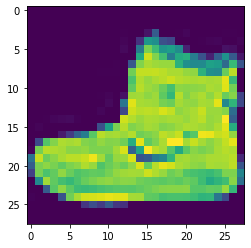

In [9]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])

In [10]:
print(test_images.shape)

(10000, 28, 28)


In [11]:
# 构造神经元模型 full connected 

In [12]:
import tensorflow as tf

In [13]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(128,activation=tf.nn.relu))
model.add(keras.layers.Dense(10,activation=tf.nn.softmax))

In [14]:
model.summary()
print((784+1)*128)
print((128+1)*10)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
100480
1290


In [15]:
# 训练和评估模型

In [16]:
model.compile(optimizer="adam",loss=tf.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [17]:
model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [18]:
print(train_labels[0]) #我们的label是9，所以用sparse_categorical_crossentroppy

9


In [19]:
[0,0,0,0,0,0,0,0,1] # 如果是这种one_hot的label，我们用categorical_crossentropy

[0, 0, 0, 0, 0, 0, 0, 0, 1]

In [20]:
model.fit(train_images,train_labels,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 43us/sample - loss: 2.9985 - accuracy: 0.6780
Epoch 2/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.6866 - accuracy: 0.7460
Epoch 3/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.5894 - accuracy: 0.7897
Epoch 4/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.5388 - accuracy: 0.8123
Epoch 5/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.5183 - accuracy: 0.8219


In [21]:
train_images=train_images/255
model.fit(train_images,train_labels,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.7004 - accuracy: 0.7550
Epoch 2/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.4300 - accuracy: 0.8488
Epoch 3/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3915 - accuracy: 0.8612
Epoch 4/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3644 - accuracy: 0.8683
Epoch 5/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3435 - accuracy: 0.8750


In [22]:
test_images_scales=test_images/255
model.evaluate(test_images_scales,test_labels)

10000/10000 [==============================] - 0s 42us/sample - loss: 0.3859 - accuracy: 0.8642


[0.3858663885831833, 0.8642]

In [36]:
# 0 T-shirt/top, 1 Trouser/pants, 2 Pullover shirt, 3 Dress, 4 Coat, 5 Sandal, 6 Shirt, 7 Sneaker, 8 Bag, 9 Ankle boot
import numpy as np
print(np.argmax(model.predict([[test_images[0]/255]])))
print(test_labels[0])

9
9


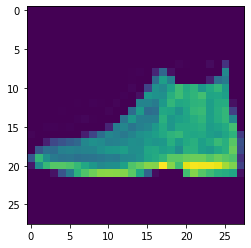

In [37]:
import matplotlib.pyplot as plt
plt.imshow(test_images[0])

In [38]:
# 自动终止训练

In [40]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')<0.4):
            print("\nLoss is low so cancelling training!")
            self.model.stop_training = True

In [42]:
callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels), (test_images,test_labels) = mnist.load_data()
training_images_scaled = train_images/255.0
test_images_scaled = test_images/255.0
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images_scaled, train_labels, epochs=5, callbacks=[callbacks])

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.4761 - accuracy: 0.8308
Epoch 2/5
59616/60000 [============================>.] - ETA: 0s - loss: 0.3580 - accuracy: 0.8701
Loss is low so cancelling training!
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3583 - accuracy: 0.8699


In [1]:
# convolutional neural network. 不同的filter有不同的效果，e.g.,例如提取水平线和竖直线
# max pooling 增强特征，减少数据（维度，e.g., 512x521->256x256）

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
model = keras.Sequential()
model.add(keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation=tf.nn.relu))
model.add(keras.layers.Dense(10,activation=tf.nn.softmax))
train_images_scaled=train_images/255
model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.sparse_categorical_crossentropy,metrics=['accuracy'])
model.fit(train_images_scaled.reshape(-1,28,28,1),train_labels,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 45s 747us/sample - loss: 0.4405 - accuracy: 0.8392
Epoch 2/5
60000/60000 [==============================] - 56s 931us/sample - loss: 0.2951 - accuracy: 0.8914
Epoch 3/5
60000/60000 [==============================] - 58s 961us/sample - loss: 0.2485 - accuracy: 0.9078
Epoch 4/5
60000/60000 [==============================] - 66s 1ms/sample - loss: 0.2174 - accuracy: 0.9193
Epoch 5/5
60000/60000 [==============================] - 64s 1ms/sample - loss: 0.1904 - accuracy: 0.9295


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [12]:
import matplotlib.pyplot as plt
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs=layer_outputs)
pred = activation_model.predict(test_images[0].reshape(1,28,28,1))
pred

[array([[[[0.01912187, 0.04775096, 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.01912187, 0.04775096, 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.01912187, 0.04775096, 0.        , ..., 0.        ,
           0.        , 0.        ],
          ...,
          [0.01912187, 0.04775096, 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.01912187, 0.04775096, 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.01912187, 0.04775096, 0.        , ..., 0.        ,
           0.        , 0.        ]],
 
         [[0.01912187, 0.04775096, 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.01912187, 0.04775096, 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.01912187, 0.04775096, 0.        , ..., 0.        ,
           0.        , 0.        ],
          ...,
          [0.01912187, 0.04775096, 0.        , ..., 0.        ,
   

In [13]:
len(pred)

7

In [14]:
pred[0].shape

(1, 26, 26, 64)

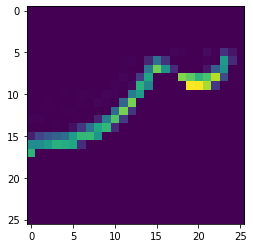

In [16]:
plt.imshow(pred[0][0,:,:,1]) # CNN层

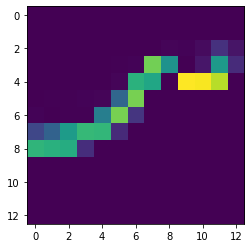

In [17]:
plt.imshow(pred[1][0,:,:,1]) # pooling层

In [8]:
[1 for x in range(1, 11)]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]